In [1]:
import pandas as pd
df=pd.read_csv("D:/dsm/Machine Learning (Codes and Data Files)/Data/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [3]:
df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [4]:
# upsampling minority class
!pip install utils
from sklearn.utils import resample

#separating yes and no subscribers
subscribed_yes=df[df.subscribed == 'yes']
subscribed_no=df[df.subscribed == 'no']

#upsampling yes-subscribed
df_minority_upsampled=resample(subscribed_yes, replace=True, n_samples=2000)

#combine majority class with the upsampled minority
new_df=pd.concat([subscribed_no, df_minority_upsampled])

#shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [5]:
from sklearn.utils import resample

#separating yes and no subscribers
subscribed_yes=df[df.subscribed == 'yes']
subscribed_no=df[df.subscribed == 'no']

#upsampling yes-subscribed
df_minority_upsampled=resample(subscribed_yes, replace=True, n_samples=2000)

#combine majority class with the upsampled minority
new_df=pd.concat([subscribed_no, df_minority_upsampled])

#shuffle
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [6]:
x_features=list(new_df.columns)
x_features.remove('subscribed')
x_features


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [7]:
encoded_df=pd.get_dummies(new_df[x_features],drop_first=True)
X=encoded_df

In [8]:
Y=new_df.subscribed.map( lambda x: int( x == 'yes') )

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
#LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

C:\Users\Admin\anaconda3w\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
preds=logit.predict(x_test)

In [12]:
#CONFUSION MATRIX
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1,0])
    sn.heatmap(cm, annot=True, fmt='.2f', 
        xticklabels = ['subscribed', 'Not subscribed'], 
        yticklabels = ['subscribed', 'Not subscribed'] )
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 
    plt.show()

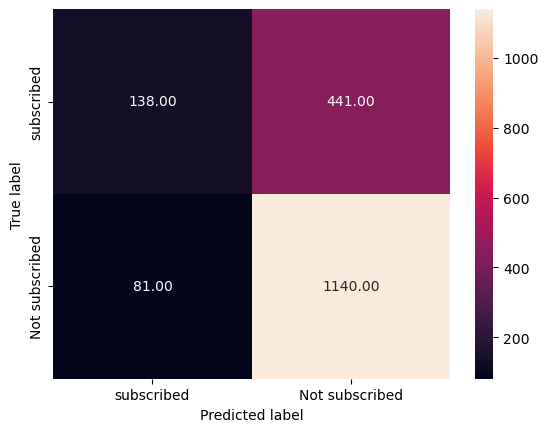

In [13]:
draw_cm(y_test,preds)

In [14]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1221
           1       0.63      0.24      0.35       579

    accuracy                           0.71      1800
   macro avg       0.68      0.59      0.58      1800
weighted avg       0.69      0.71      0.66      1800



In [15]:
## Predicting the probability values for test cases 
predict_proba_df = pd.DataFrame( logit.predict_proba(x_test) ) 
predict_proba_df.head()

,0,1
0,0.749541,0.250459
1,0.493056,0.506944
2,0.491813,0.508187
3,0.709756,0.290244
4,0.618790,0.381210


In [16]:
## Initializing the DataFrame with actual class labels 
test_results_df = pd.DataFrame( {'actual':y_test} ) 
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]

In [17]:
test_results_df.head(5)

,index,actual,chd_1
0,794,1,0.250459
1,3786,1,0.506944
2,1742,0,0.508187
3,304,0,0.290244
4,4404,0,0.381210


In [18]:
# Passing actual class labels and predicted probability values 
# to compute ROC AUC score.
auc_score = metrics.roc_auc_score(test_results_df.actual,
test_results_df.chd_1)
round( float( auc_score ), 2 )

0.69

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc_curve(model,x_test,y_test):
    # Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame({'actual':y_test})
    test_results_df = test_results_df.reset_index()

    # Predict the probabilities on the test set
    predict_proba_df = pd.DataFrame(model.predict_proba(x_test))

    # Selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

    # Invoke roc_curve() to return fpr, tpr and threshold values.
    # Threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

    # Getting roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)

    # Setting the size of the plot
    plt.figure(figsize=(8, 6))

    # Plotting the actual fpr and tpr values
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    # Plotting the diagonal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()

    return auc_score, fpr, tpr, thresholds


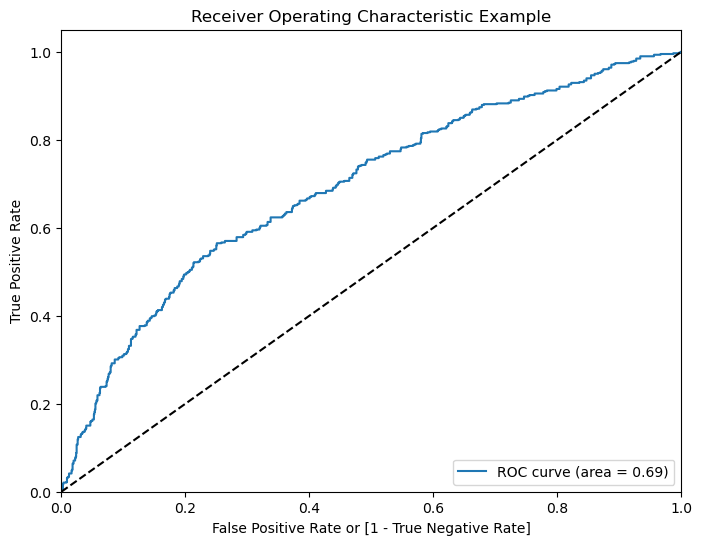

In [20]:
## Invoking draw_roc_curve with the logistic regression model
_, _, _, _ = draw_roc_curve( logit,x_test,y_test)

USING KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)


KNeighborsClassifier()

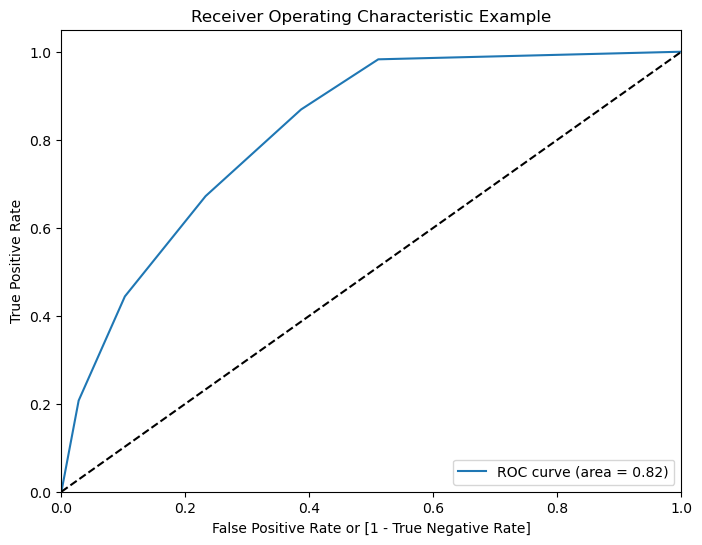

In [22]:
_, _, _, _ = draw_roc_curve(knn_clf,x_test,y_test)

C:\Users\Admin\anaconda3w\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


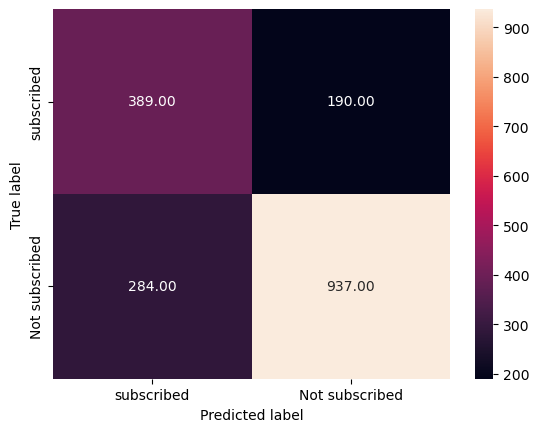

In [23]:
predds=knn_clf.predict(x_test)
draw_cm(y_test,predds)

In [24]:
print(metrics.classification_report(y_test,predds))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1221
           1       0.58      0.67      0.62       579

    accuracy                           0.74      1800
   macro avg       0.70      0.72      0.71      1800
weighted avg       0.75      0.74      0.74      1800



In [25]:
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Creating a dictionary with hyperparameters and their possible values for search
tuned_parameters = [{'n_neighbors': range(5, 10), 'metric': ['canberra', 'euclidean', 'minkowski']}]
# Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10, scoring='roc_auc')
# Fitting the search with the training set
clf.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [26]:
clf.best_score_

0.8207744141124447

In [27]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [28]:
knn1_clf=KNeighborsClassifier(n_neighbors=5,metric='canberra')
knn1_clf.fit(x_train,y_train)


KNeighborsClassifier(metric='canberra')

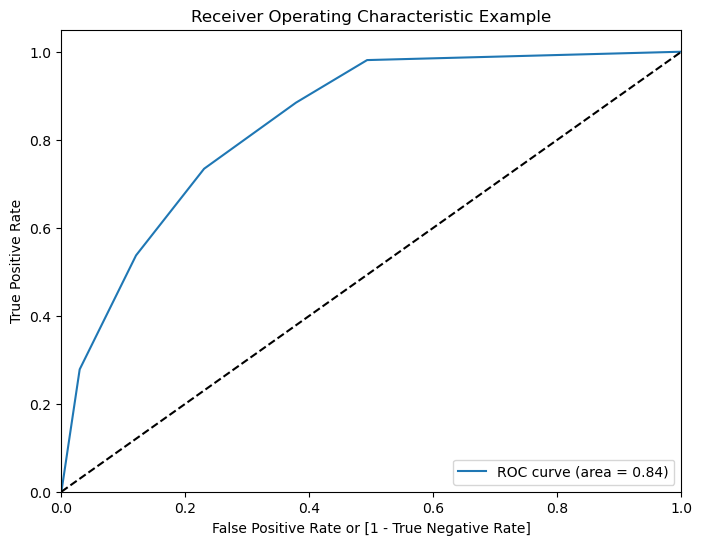

In [29]:
_, _, _, _ = draw_roc_curve(knn1_clf,x_test,y_test)

# Using Ensemble Methods

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rand_clf=RandomForestClassifier(max_depth=15, n_estimators=20)
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

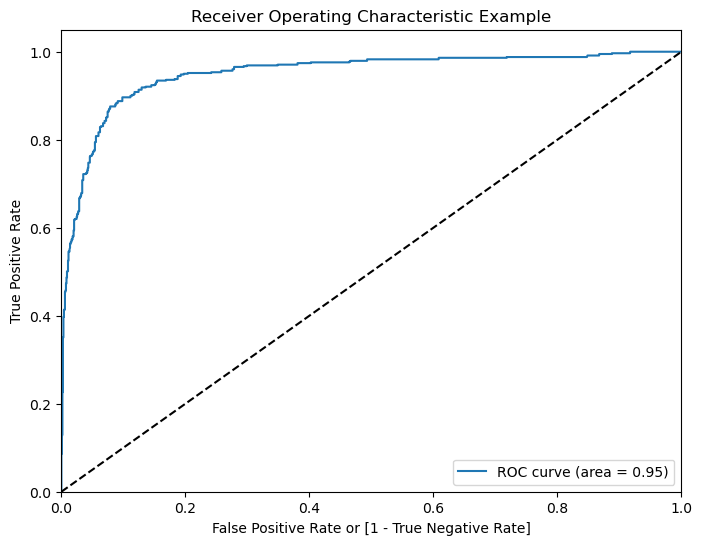

In [39]:
_, _, _, _ = draw_roc_curve(rand_clf,x_test,y_test)

In [40]:
from sklearn.model_selection import GridSearchCV

# Configuring parameters and values for search
tuned_parameters = [{'max_depth': [10, 15],
                     'n_estimators': [10, 20], 
                     'max_features': ['sqrt', 0.2]}]

# Initializing the RF classifier
radm_clf = RandomForestClassifier()

# Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                   tuned_parameters, 
                   cv=5, 
                   scoring='roc_auc')

# Fitting the training set
clf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [41]:
clf.best_score_

0.9339448624379401

In [42]:
clf.best_params_

{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 20}

In [43]:
radm_clf=RandomForestClassifier(max_depth=15,n_estimators=20,max_features='auto')
radm_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

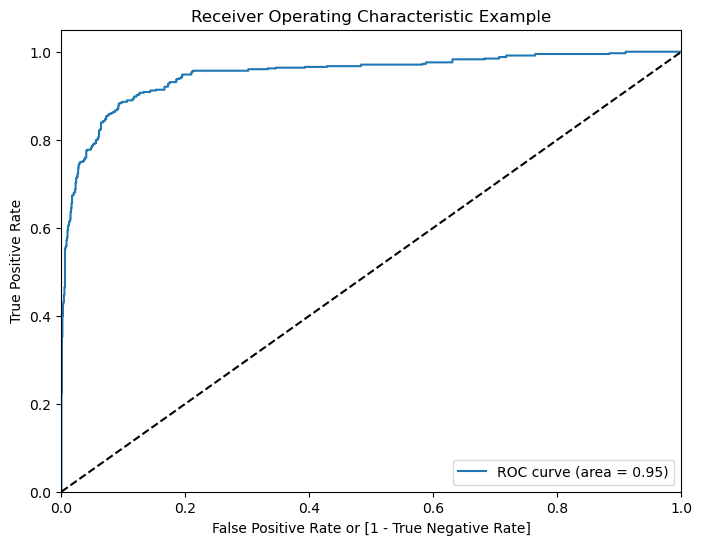

In [45]:
_, _, _, _ = draw_roc_curve( clf,x_test,y_test )

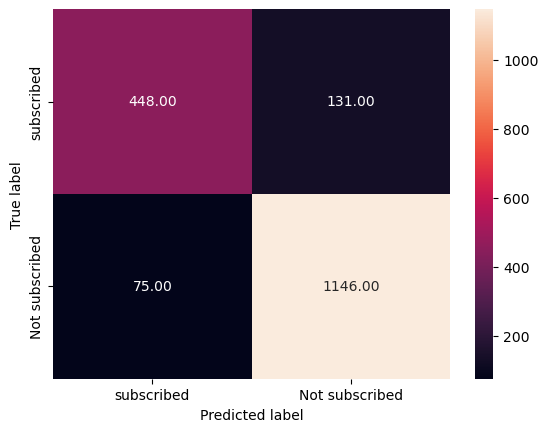

In [46]:
rpreds=radm_clf.predict(x_test)
draw_cm(y_test,rpreds)

In [47]:
print(metrics.classification_report(y_test,rpreds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1221
           1       0.86      0.77      0.81       579

    accuracy                           0.89      1800
   macro avg       0.88      0.86      0.87      1800
weighted avg       0.88      0.89      0.88      1800



<AxesSubplot:xlabel='importance', ylabel='feature'>

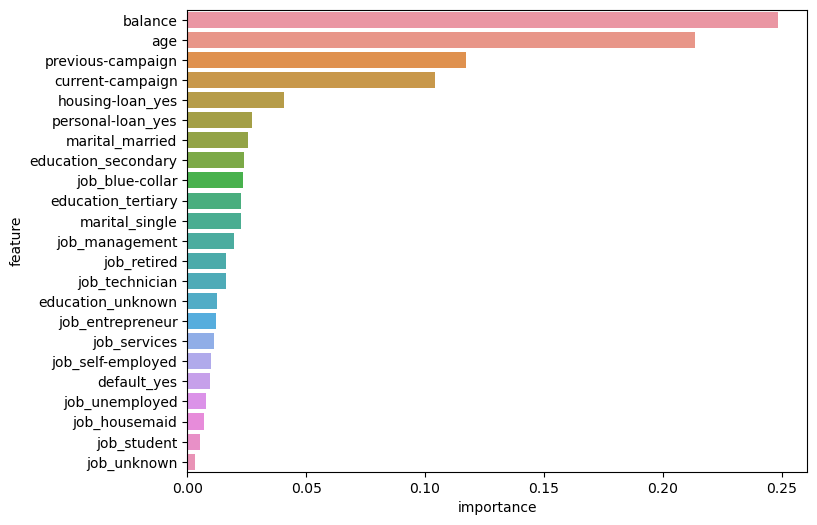

In [48]:
import numpy as np
# Create a dataframe to store the features and their corresponding importances
feature_rank = pd.DataFrame({'feature': x_train.columns,
                             'importance': radm_clf.feature_importances_})

# Sorting the features based on their importances with the most important feature at the top.
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
# Plot the values
sn.barplot(y='feature', x='importance', data=feature_rank)